This notebook is intended to explore Principal Components Analysis (PCA) and its role in exploring experimental two-photon microsopy data. We will begin with a two dimensional PCA performed on only one frame of data. The frame being explored is shown below

------

In [245]:
%matplotlib inline
import numpy as np
import sys
sys.path.append("/home/ndc08/code/research/cil/maxPlanck/tools")
from tools import readWrite as rw
import matplotlib.pyplot as plt

dataPath = "/media/ndc08/Wares/Data/maxPlanck/ferret2152_TSeries-01292015-1540_site3_0.75ISOF_AL/ferret2152_TSeries-01292015-1540_site3_0.75ISOF_AL.tif"

data = rw.loadData(dataPath)

-- Loading Data...
	- Numpy file already exists. Loading /media/ndc08/Wares/Data/maxPlanck/ferret2152_TSeries-01292015-1540_site3_0.75ISOF_AL/ferret2152_TSeries-01292015-1540_site3_0.75ISOF_AL_float64.npy...


We begin be preprocessing the image in a manner often referred to as "whitening" the data. We remove the mean and adjust for variance.

In [265]:
avg = np.array([np.average(d) for d in data])
normedData = data - avg[:,None,None]
#downSampledData = normedData[:,::2,::2]
downSampledData = normedData[:,:,:]
z,y,x = downSampledData.shape
newData = downSampledData.transpose((0,2,1)).reshape(z,y*x).T

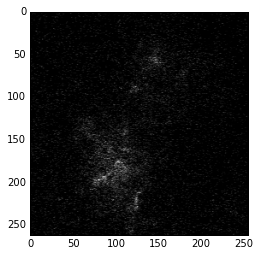

In [279]:
plt.imshow(downSampledData.transpose((0,2,1))[72].T, cmap="gray")

In [266]:
u,s,v = np.linalg.svd(newData, full_matrices=False)

In [268]:
u.shape

(67072, 544)

In [269]:
s.shape

(544,)

In [270]:
v.shape

(544, 544)

In [271]:
lmbda = np.power(s,2)/(z-1)

In [288]:
lmbda[:10].sum()/lmbda.sum()

0.47137722911509261

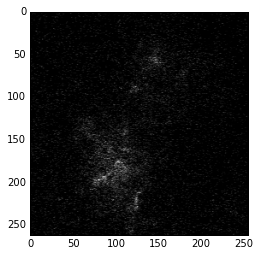

In [278]:
k=544
plt.imshow(np.dot(u[:,:k], np.dot(np.diag(s[:k]),v[:k,:])).T[72].reshape(x,y).T,cmap="gray")

In [280]:
pcs = np.dot(u[:,:k], np.diag(s[:k])).T

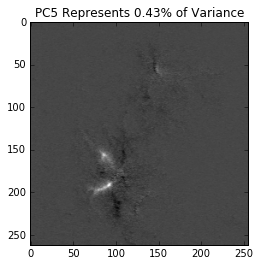

In [286]:
i=5
plt.title("PC%d Represents %.02f%% of Variance" % (i, lmbda[i]/lmbda.sum()*100))
plt.imshow(pcs[i].reshape(x,y).T, cmap="gray")
plt.savefig("transpose_pc%d" % (i), bbox_inches="tight")

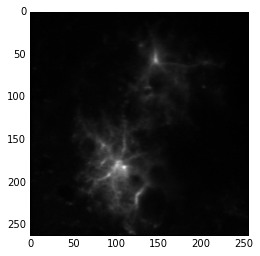

In [201]:
plt.imshow(np.average(data,0), cmap="gray")
plt.savefig("average", bbox_inches="tight")

In [231]:
pc0 = pcs[0].reshape(y,x)
avg = np.average(normedData,0)
np.linalg.norm(pc0/pc0.max() - avg/avg.max(), ord='fro')

1.320540766512307

-918.20655768365634

In [240]:
(pc0)[215:219,215:219]

array([[-541.52685311, -632.3920516 , -671.33081113, -638.11698211],
       [-491.67525902, -551.56115052, -592.67966166, -598.79934213],
       [-608.34007834, -544.73746358, -547.21467089, -551.43965854],
       [-650.40020089, -660.47301552, -648.80989134, -591.9398739 ]])

In [241]:
(avg-np.average(avg))[215:219,215:219]

array([[-22.90735252, -25.93492605, -28.7915437 , -28.35588194],
       [-20.92757311, -23.69044076, -24.98639664, -25.44963194],
       [-25.80992605, -23.17757311, -22.63897017, -22.55073488],
       [-27.67941135, -28.14264664, -28.08382311, -25.12794076]])

In [242]:
np.average(pc0 / avg)

23.714130272117824

In [243]:
pc0[215:219,215:219] / avg[215:219,215:219]

array([[ 23.63987076,  24.38380006,  23.31694396,  22.50386652],
       [ 23.49413649,  23.28201303,  23.72009338,  23.52880166],
       [ 23.5700047 ,  23.50278267,  24.1713588 ,  24.45328995],
       [ 23.49761679,  23.46875985,  23.10261992,  23.55703874]])

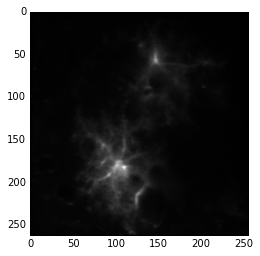

In [232]:
plt.imshow(pc0, cmap="gray")

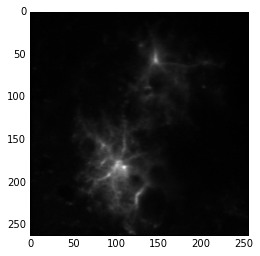

In [233]:
plt.imshow(avg, cmap="gray")

In [244]:
p = pc0.reshape(262*256)
a = avg.reshape(262*256)
np.dot(a, p)/(np.sqrt(np.dot(p,p))*np.sqrt(np.dot(a,a)))

0.99897089362568503

In [254]:
a = np.arange(24).reshape(2,3,4)
a

array([[[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11]],

       [[12, 13, 14, 15],
        [16, 17, 18, 19],
        [20, 21, 22, 23]]])

In [267]:
a.transpose((0,2,1)).reshape(2,12).T

array([[ 0, 12],
       [ 4, 16],
       [ 8, 20],
       [ 1, 13],
       [ 5, 17],
       [ 9, 21],
       [ 2, 14],
       [ 6, 18],
       [10, 22],
       [ 3, 15],
       [ 7, 19],
       [11, 23]])